In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score

SEED = 42
np.random.seed(SEED) # for reproducibility

In [4]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

### import dataset

In [30]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
categorical_feature_names=['MSZoning','Street','Alley','LotShape','LandContour','Utilities'
                           ,'LotConfig','LandSlope','Neighborhood','Condition1','Condition2'
                           ,'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st'
                           ,'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation'
                           ,'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
                           ,'Heating','HeatingQC','CentralAir','Electrical','KitchenQual'
                           ,'Functional','FireplaceQu','GarageType','GarageFinish'
                           ,'GarageQual','GarageCond','PavedDrive','PoolQC','Fence'	,'MiscFeature'
                           ,'SaleType','SaleCondition']
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

the column Id is not necessary for model so drop it

In [31]:
train = train.drop("Id", axis=1)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### plot sale prices distribution

<Figure size 900x800 with 0 Axes>

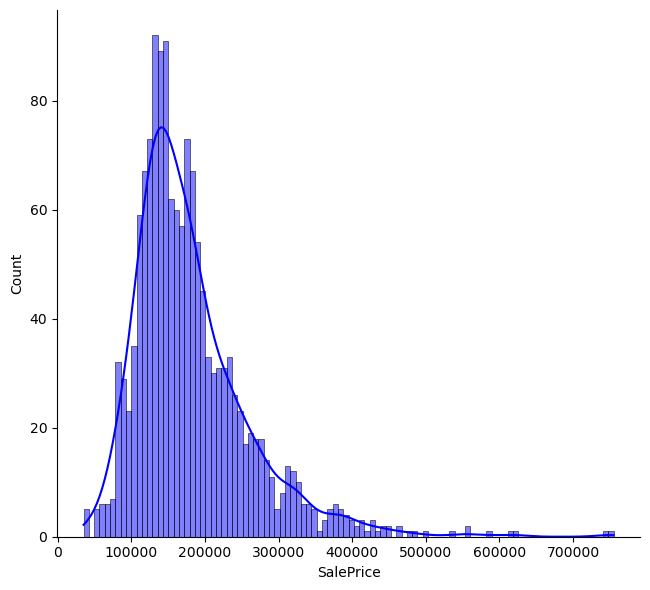

In [34]:
plt.figure(figsize=(9, 8))
#sns.distplot(train['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});
sns.displot(train['SalePrice'], color='b', bins=100, alpha=0.5, kde=True, height=6, aspect=1.1)


In [35]:
train.describe

<bound method NDFrame.describe of       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0        

In [36]:
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head(3)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  

[3 rows x 37 columns]

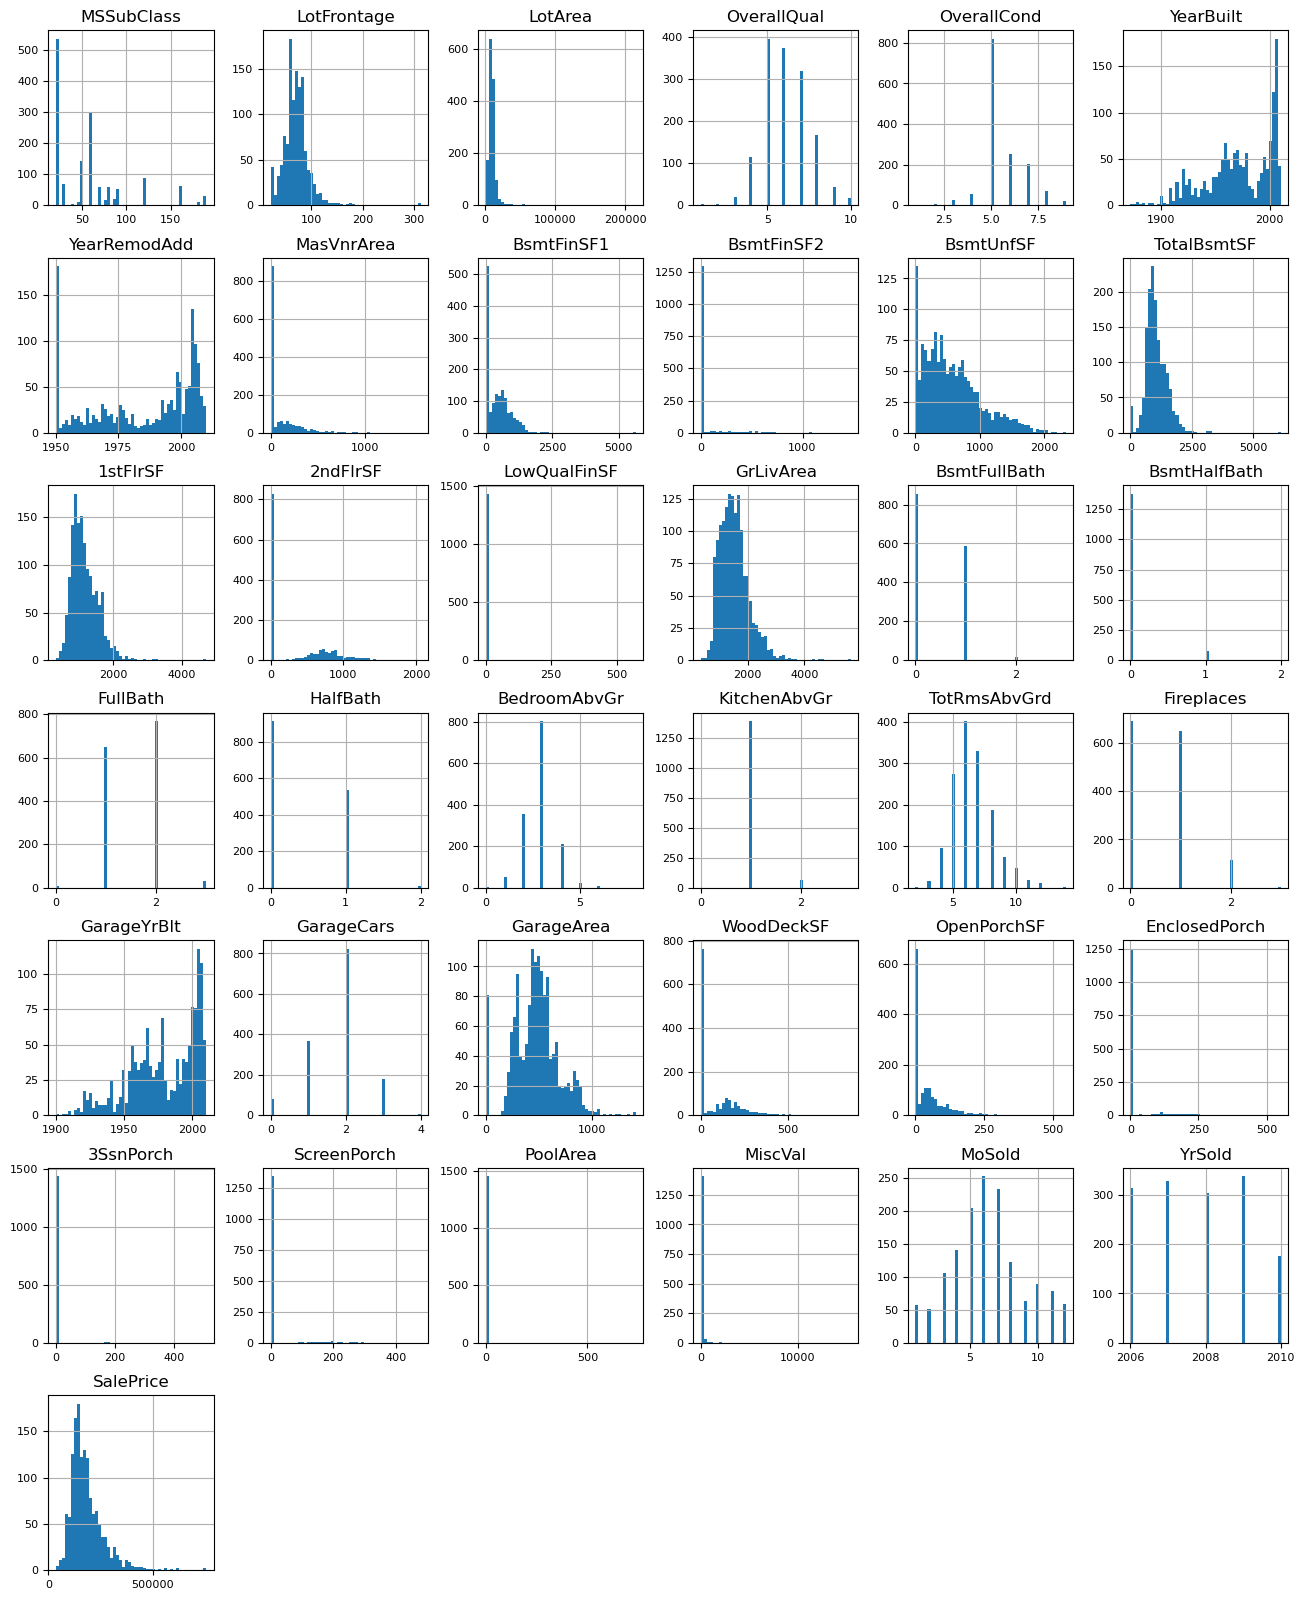

In [39]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### convert categorical features into integer codes

In [44]:
label_name = "SalePrice"
for feat in categorical_feature_names:
    train[feat] = pd.Categorical(train[feat])
    train[feat] = train[feat].cat.codes
    test[feat] = pd.Categorical(test[feat])
    test[feat] = test[feat].cat.codes

feature_names = list(train.columns)
feature_names.remove(label_name)
print("Num. features: {}, feature names: {}".format(len(feature_names), feature_names))

Num. features: 79, feature names: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Screen

In [14]:
train.head(3)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3         65.0     8450       1      0         3   
1          20         3         80.0     9600       1      0         3   
2          60         3         68.0    11250       1      0         0   

   LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0            3          0          4  ...         0       0      0   
1            3          0          2  ...         0       0      0   
2            3          0          4  ...         0       0      0   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            0        0       2    2008         8              4     208500  
1            0        0       5    2007         8              4     181500  
2            0        0       9    2008         8              4     223500  

[3 rows x 80 columns]

### Prepare data to be in numpy format

In [45]:
X_train = train[feature_names].to_numpy()
y_train = train[label_name].to_numpy().astype(float)
X_test = test[feature_names].to_numpy()


### train the random foerst model

In [48]:
rfm = RandomForestRegressor(random_state=SEED,  min_samples_leaf=20)
rfm.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=20, random_state=42)

In [49]:
y_pred = rfm.predict(X_test)
y_pred

array([123837.1487438 , 149765.34041463, 179683.31600993, ...,
       155921.39442051, 114639.51375986, 232645.90839091])

### put the result into submission.csv

In [50]:
submission = pd.DataFrame({
    'Id':test['Id'].values,
    'SalePrice':y_pred
})
submission.to_csv('submission.csv', index=False)

In [13]:
import os
print(os.getcwd())

C:\Users\pc\machine learning\exercise1
